In [399]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Matrix loading
def load_matrix(file):
    data = loadmat(file)
    return data['train'], data['y_train']

# Sigmoid activation function
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

In [400]:
class NeuralNetwork:

  def __init__(self, input_size, hidden_size, output_size, epochs, lmbda, alpha):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.epochs = epochs
    self.lmbda = lmbda
    self.alpha = alpha

    self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.1
    self.b1 = np.zeros((1, self.hidden_size))
    self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.1
    self.b2 = np.zeros((1, self.output_size))

  def train(self, train, y_train, plot=False):
    self.costs = []
    self.errors = []
    for epoch in range(self.epochs):
      cost, self.W1, self.b1, self.W2, self.b2 = self.iterate(train, y_train, self.W1, self.b1, self.W2, self.b2, self.alpha, self.lmbda)
      # print(f"Epoch {epoch+1}/{self.epochs}, Cost: {cost}")
      self.costs.append(cost)
      self.errors.append(self.get_classification_error(train, y_train))

    if plot:
      self.plot_errors_costs()

  def plot_errors_costs(self):
    fig, ax = plt.subplots(2, 1, figsize=(8, 9))
    x = np.arange(0, self.epochs)
    y_costs = self.costs
    y_errors = self.errors
    ax[0].plot(x, y_costs)
    ax[1].plot(x, y_errors)
    ax[0].set_title('Cost over Epochs')
    ax[1].set_title('Classification Error over Epochs')

  def classify(self, test):
    a2 = sigmoid(np.dot(test, self.W1) + self.b1)
    a3 = sigmoid(np.dot(a2, self.W2) + self.b2)
    return np.round(a3)

  def hidden_pass(self, test):
    a2 = sigmoid(np.dot(test, self.W1) + self.b1)
    return a2

  def get_classification_error(self, test, y_test):
    predictions = self.classify(test)
    # print(np.sum(predictions != y_test), "wrong out of", y_test.shape[0])
    return np.mean(predictions != y_test)

  def iterate(self, train, y_train, W1, b1, W2, b2, ALPHA, LAMBDA):

    m, d = train.shape
    ###Forward pass

    a2 = sigmoid(np.dot(train, W1) + b1)
    a3 = sigmoid(np.dot(a2, W2) + b2)

    ###Backpropagation
    delta3 = a3 - y_train

    ###Compute cost
    mean_squared_error = np.mean(delta3 ** 2)
    regularization_term = (LAMBDA / (2 * m)) * (np.sum(W1**2) + np.sum(W2**2))
    cost = mean_squared_error + regularization_term

    delta3_sigmoided = delta3 * sigmoid_derivative(a3)
    W2_grad = (1 / m) * np.dot(a2.T, delta3_sigmoided) + (LAMBDA / m) * W2
    b2_grad = (1 / m) * np.sum(delta3_sigmoided, axis=0, keepdims=True)

    delta2 = np.dot(delta3, W2.T) * sigmoid_derivative(a2)
    W1_grad = (1 / m) * np.dot(train.T, delta2) + (LAMBDA / m) * W1
    b1_grad = (1 / m) * np.sum(delta2, axis=0, keepdims=True)


    ###Update weights and biases by following negative gradients
    W1 -= ALPHA * W1_grad
    b1 -= ALPHA * b1_grad
    W2 -= ALPHA * W2_grad
    b2 -= ALPHA * b2_grad

    return cost, W1, b1, W2, b2

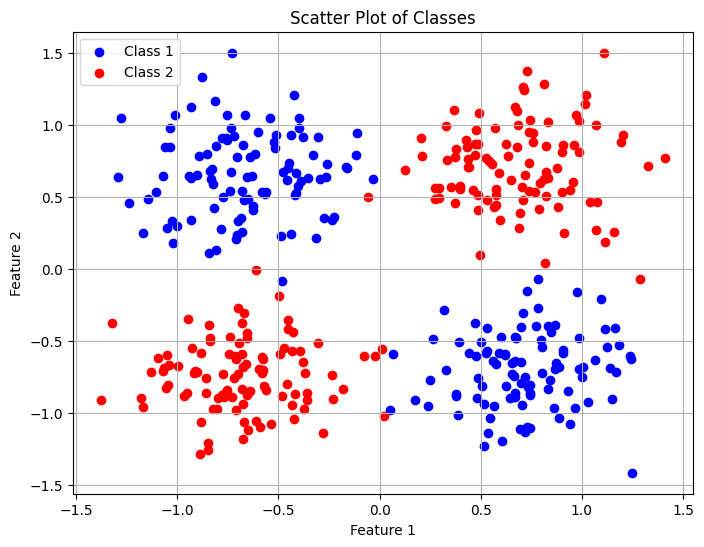

In [401]:
# Question 1
train_1, y_train_1 = load_matrix("data1.mat")

def plot_data(train, y_train):
  class1 = np.array([train[x] for x in range(len(train)) if y_train[x] == 1])
  class2 = np.array([train[x] for x in range(len(train)) if y_train[x] == 0])

  plt.figure(figsize=(8, 6))
  plt.scatter(class1[:, 0], class1[:, 1], label='Class 1', color='blue')
  plt.scatter(class2[:, 0], class2[:, 1], label='Class 2', color='red')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Scatter Plot of Classes')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_data(train_1, y_train_1)

The classes are not linearly separable, or at least not in two dimensions.

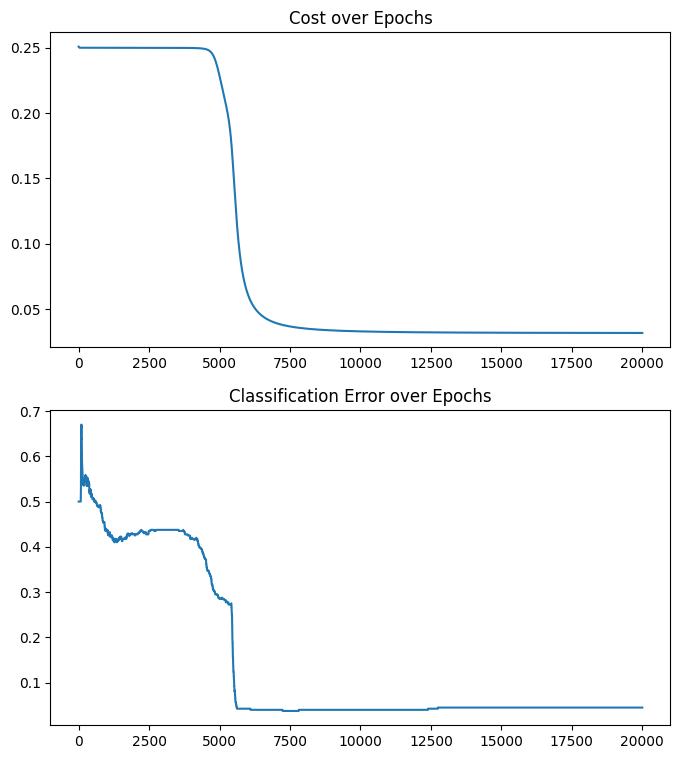

In [402]:
q1NN = NeuralNetwork(2, 2, 1, 20000, 0.0001, 0.5)
q1NN.train(train_1, y_train_1, plot=True)

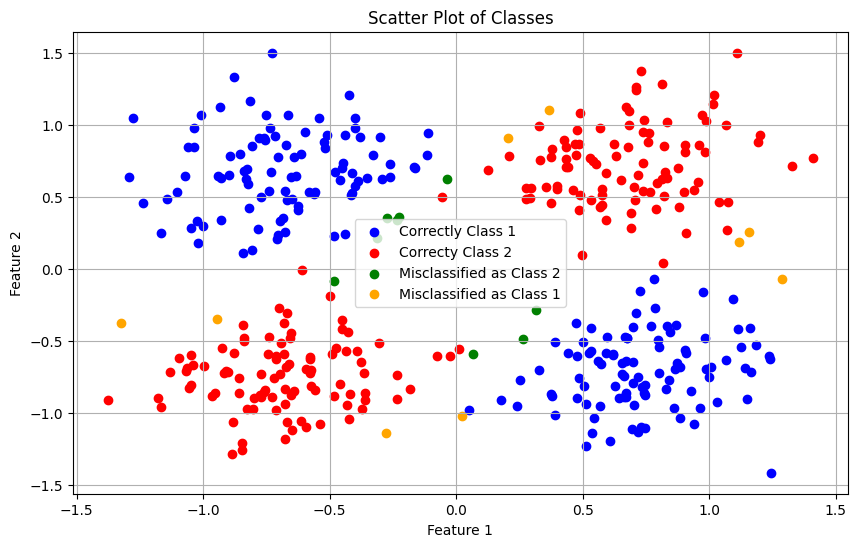

In [403]:
predicted_1 = q1NN.classify(train_1)

def show_classification(train, y_train, predicted):
  class1 = np.array([train[x] for x in range(len(train)) if (y_train[x] == 1 and predicted[x] == 1)])
  class2 = np.array([train[x] for x in range(len(train)) if (y_train[x] == 0 and predicted[x] == 0)])
  class3 = np.array([train[x] for x in range(len(train)) if (y_train[x] == 1 and predicted[x] == 0)])
  class4 = np.array([train[x] for x in range(len(train)) if (y_train[x] == 0 and predicted[x] == 1)])

  plt.figure(figsize=(10, 6))
  plt.scatter(class1[:, 0], class1[:, 1], label='Correctly Class 1', color='blue')
  plt.scatter(class2[:, 0], class2[:, 1], label='Correcty Class 2', color='red')
  plt.scatter(class3[:, 0], class3[:, 1], label='Misclassified as Class 2', color='green')
  plt.scatter(class4[:, 0], class4[:, 1], label='Misclassified as Class 1', color='orange')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Scatter Plot of Classes')
  plt.legend()
  plt.grid(True)
  plt.show()

show_classification(train_1, y_train_1, predicted_1)

x1 range: (-1.3762936494689502, 1.4091675544824458)
x2 range: (-1.4124186404027022, 1.5017207255386205)


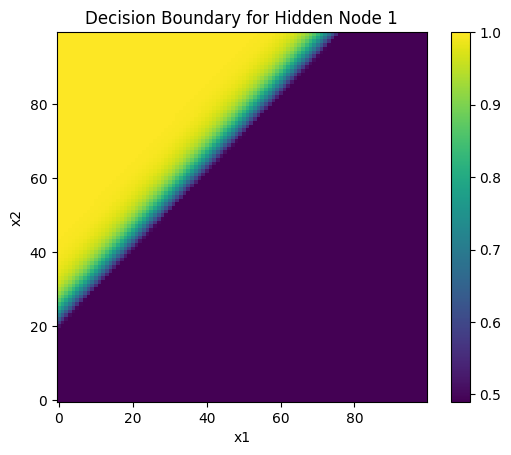

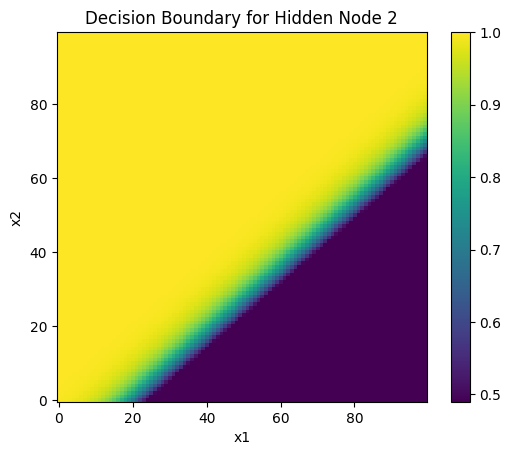

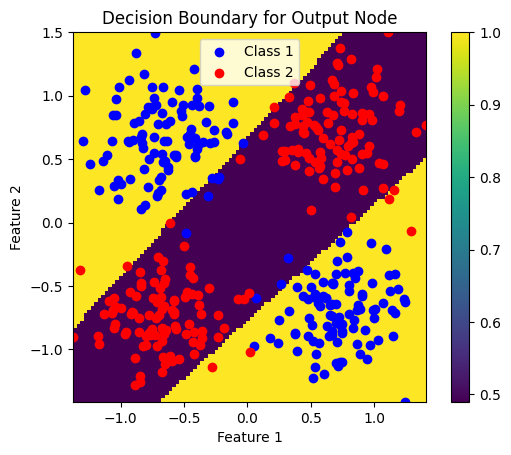

In [404]:
def show_hidden_boundaries(neural_net, train, y_train):
  x1_min = train[:, 0].min()
  x1_max = train[:, 0].max()
  x2_min = train[:, 1].min()
  x2_max = train[:, 1].max()

  print(f"x1 range: ({x1_min}, {x1_max})")
  print(f"x2 range: ({x2_min}, {x2_max})")

  # Number of points in each dimension of the grid
  num_points = 100

  # Create arrays for x1 and x2 values
  x1_range = np.linspace(x1_min, x1_max, num_points)
  x2_range = np.linspace(x2_min, x2_max, num_points)

  # Create a grid of points using meshgrid
  x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

  # Get the weights and biases for the hidden layer
  W1 = neural_net.W1
  b1 = neural_net.b1

  # Initialize an array to store the outputs for each hidden node
  hidden_node_outputs = np.zeros((num_points, num_points, neural_net.hidden_size))

  # Calculate the output for each hidden node
  for i in range(neural_net.hidden_size):
      hidden_node_outputs[:, :, i] = sigmoid(x1_grid * W1[0, i] + x2_grid * W1[1, i] + b1[0, i])

  # Plot the decision boundaries for each hidden node
  for i in range(neural_net.hidden_size):
      #plt.contourf(x1_grid, x2_grid, hidden_node_outputs[:, :, i], alpha=0.5)
      plt.imshow(hidden_node_outputs[:, :, i], vmin=0.49, vmax=1, origin='lower')
      plt.colorbar()
      plt.title(f"Decision Boundary for Hidden Node {i + 1}")
      plt.xlabel("x1")
      plt.ylabel("x2")
      plt.show()

  # Initialize an array to store the outputs for each hidden node
  grid_inputs = np.array([x1_grid.ravel(), x2_grid.ravel()]).T

  # Calculate the output for each hidden node
  node_outputs = neural_net.classify(grid_inputs)
  node_outputs = node_outputs.reshape(x1_grid.shape)

  class1 = np.array([train[x] for x in range(len(train)) if y_train[x] == 1])
  class2 = np.array([train[x] for x in range(len(train)) if y_train[x] == 0])

  plt.imshow(node_outputs, vmin=0.49, vmax=1, origin='lower', extent=[x1_min, x1_max, x2_min, x2_max])
  plt.colorbar()
  plt.scatter(class1[:, 0], class1[:, 1], label='Class 1', color='blue')
  plt.scatter(class2[:, 0], class2[:, 1], label='Class 2', color='red')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Decision Boundary for Output Node')
  plt.legend()
  plt.show()

show_hidden_boundaries(q1NN, train_1, y_train_1)

Really interestingly, it seems as if each of the hidden nodes delineate a portion of the overall classification decision between themselves, where the first hidden layer distinguishes class 1 from class 2 nearer to the positive y direction, and the second does the same in the opposite direction.

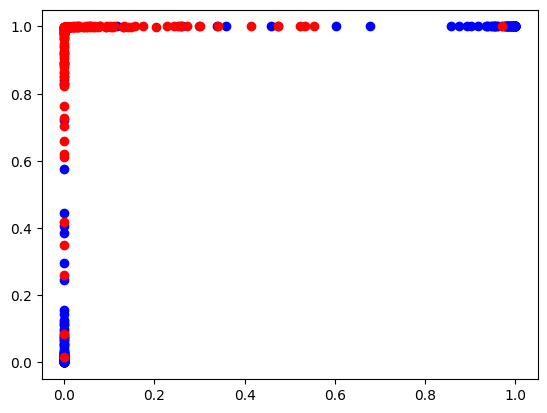

In [405]:
hidden_outputs = q1NN.hidden_pass(train_1)

class1 = np.array([hidden_outputs[x] for x in range(len(train_1)) if y_train_1[x] == 1])
class2 = np.array([hidden_outputs[x] for x in range(len(train_1)) if y_train_1[x] == 0])

plt.scatter(class1[:, 0], class1[:, 1], label='Class 1', color='blue')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2', color='red')

The points now are mostly linearly separable, as I can draw a diagonal line and successfully separate most out of the two classes. One way to look at what is happening is as a transformation of the axes the points lie on, a reparametrization that allows for us to see the points in a different way.

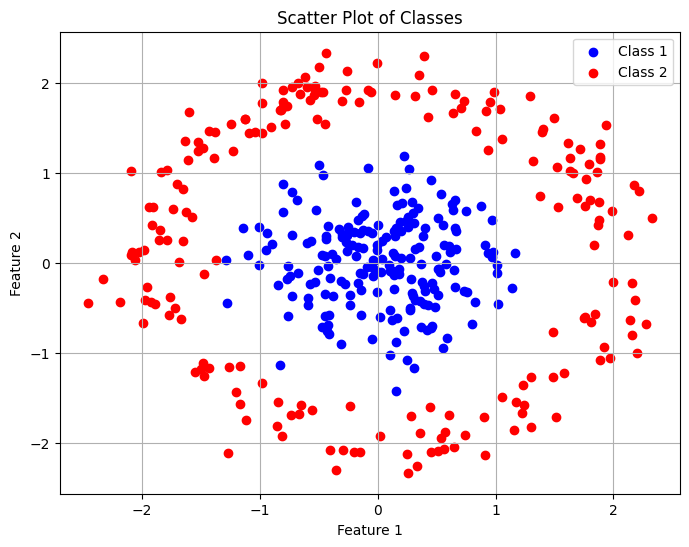

In [406]:
train_2, y_train_2 = load_matrix("data2.mat")
plot_data(train_2, y_train_2)

The classes are not linearly separable.

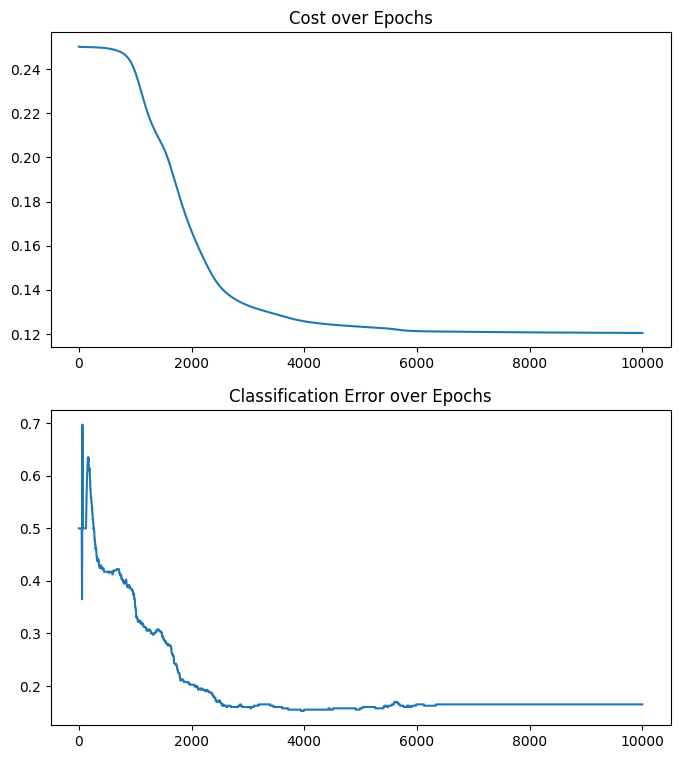

In [407]:
q2NN = NeuralNetwork(2, 2, 1, 10000, 0.0001, 0.5)
q2NN.train(train_2, y_train_2, plot=True)

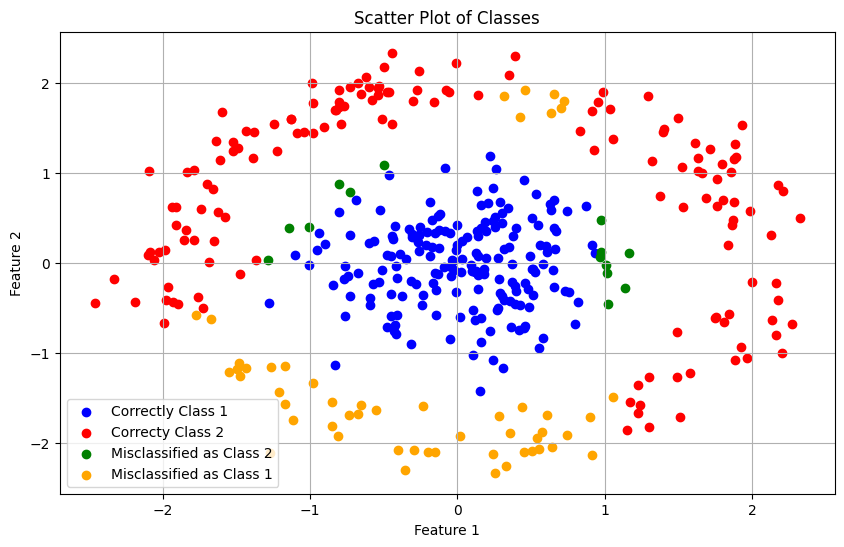

In [408]:
predicted_2 = q2NN.classify(train_2)
show_classification(train_2, y_train_2, predicted_2)

x1 range: (-2.4597675756768673, 2.3234718642045267)
x2 range: (-2.333806081459047, 2.337068608072425)


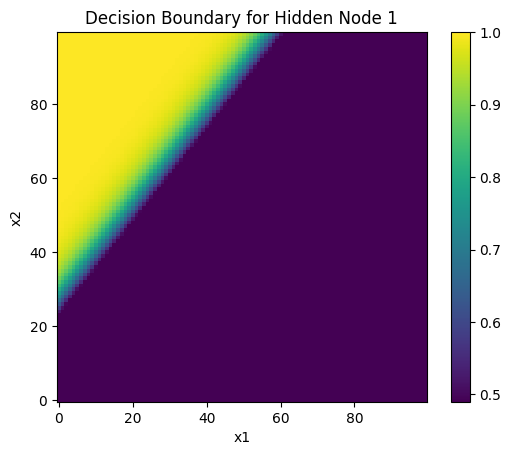

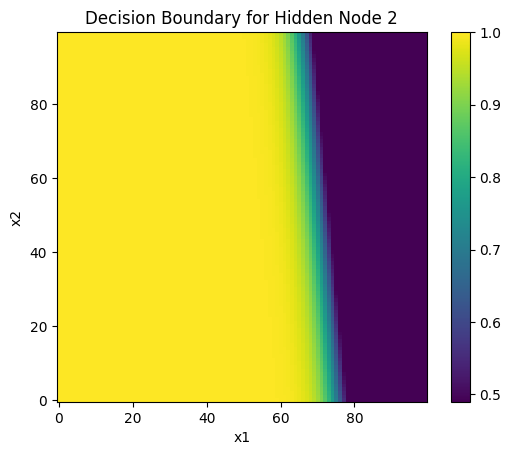

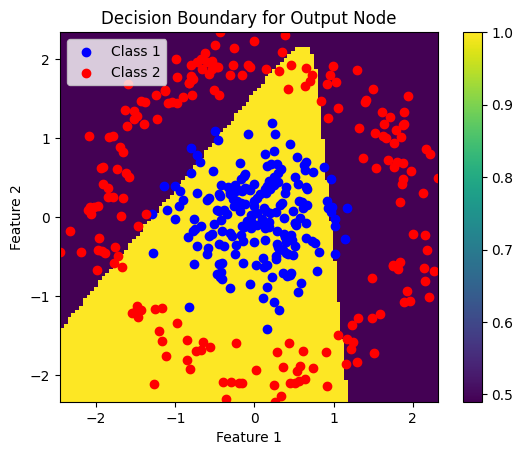

In [409]:
show_hidden_boundaries(q2NN, train_2, y_train_2)

While they aren't terrible, we don't have enough decision boundaries to adequately capture the nonlinearity of the separation. We would need a lot more hidden nodes to combine to better capture the classification.

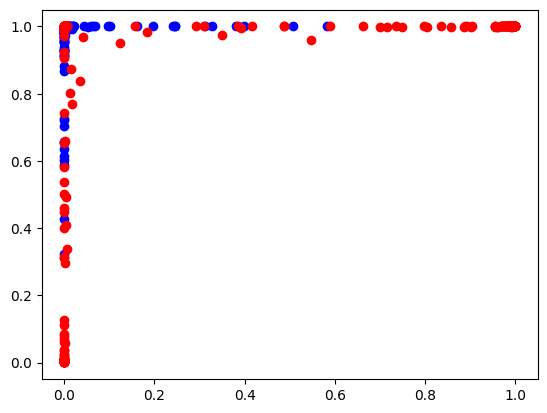

In [410]:
hidden_outputs = q2NN.hidden_pass(train_2)

class1 = np.array([hidden_outputs[x] for x in range(len(train_2)) if y_train_2[x] == 1])
class2 = np.array([hidden_outputs[x] for x in range(len(train_2)) if y_train_2[x] == 0])

plt.scatter(class1[:, 0], class1[:, 1], label='Class 1', color='blue')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2', color='red')

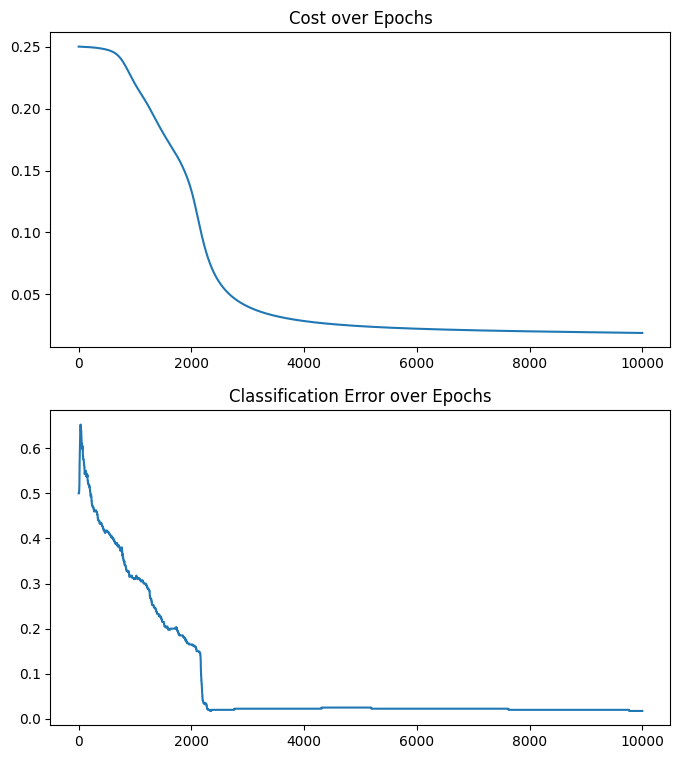

In [411]:
q3NN = NeuralNetwork(2, 3, 1, 10000, 0.0001, 0.5)
q3NN.train(train_2, y_train_2, plot=True)

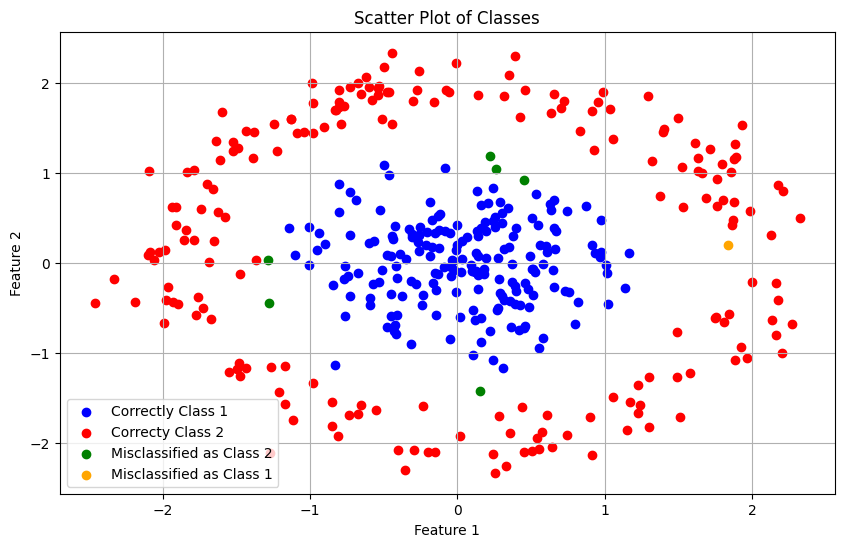

In [412]:
predicted_3 = q3NN.classify(train_2)
show_classification(train_2, y_train_2, predicted_3)

x1 range: (-2.4597675756768673, 2.3234718642045267)
x2 range: (-2.333806081459047, 2.337068608072425)


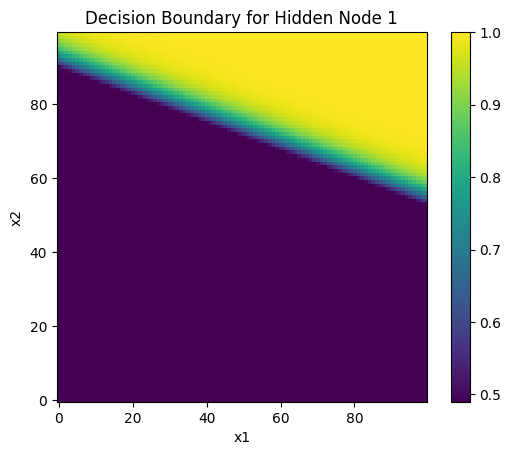

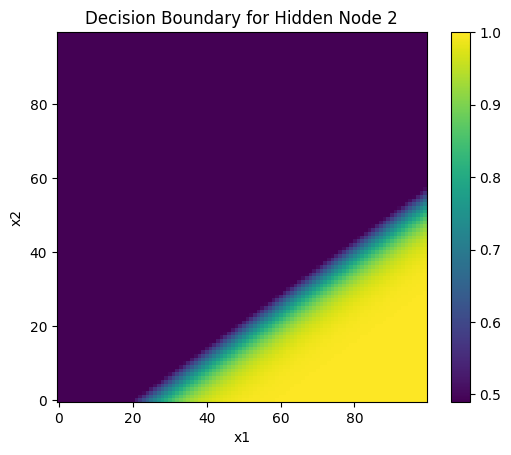

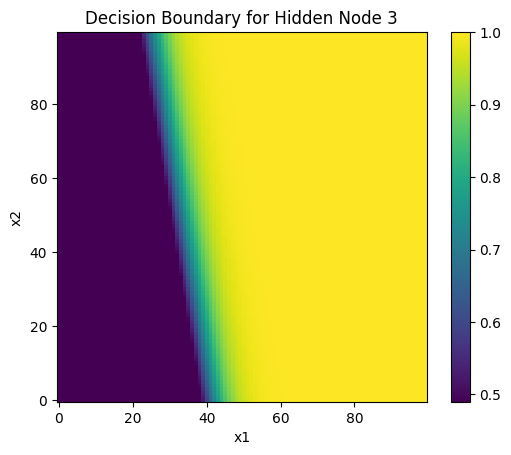

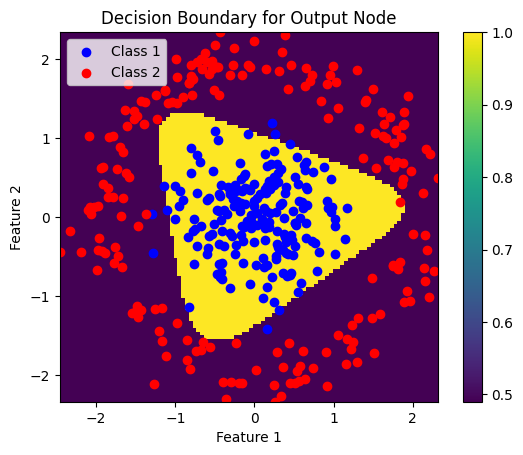

In [413]:
show_hidden_boundaries(q3NN, train_2, y_train_2)

Adding the third hidden node meant we could better capture the nonlinear decision boundary as a union of linear ones. A triangle happens to be enough to close out a space, and with even more hidden nodes, we could better and better fit to an adequate separator.

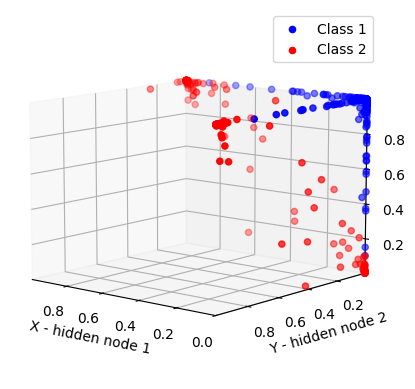

In [414]:
hidden_outputs = q3NN.hidden_pass(train_2)

class1 = np.array([hidden_outputs[x] for x in range(len(train_2)) if y_train_2[x] == 1])
class2 = np.array([hidden_outputs[x] for x in range(len(train_2)) if y_train_2[x] == 0])

ax = plt.figure().add_subplot(projection='3d')

ax.scatter(class1[:, 0], class1[:, 1], zs = class1[:, 2], label='Class 1', color='blue')
ax.scatter(class2[:, 0], class2[:, 1], zs = class2[:, 2], label='Class 2', color='red')

ax.set_xlim(hidden_outputs[:, 0].min(), hidden_outputs[:, 0].max())
ax.set_ylim(hidden_outputs[:, 1].min(), hidden_outputs[:, 1].max())
ax.set_zlim(hidden_outputs[:, 2].min(), hidden_outputs[:, 2].max())

ax.set_xlabel('X - hidden node 1')
ax.set_ylabel('Y - hidden node 2')
ax.set_zlabel('Z - hidden node 3')

ax.view_init(elev=10., azim=130, roll=0)

ax.legend()
plt.show()